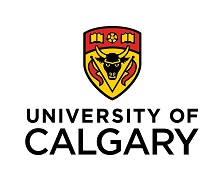

In [434]:
from IPython.display import Image
Image("../Images/Logo.jpg")

# <center>Homework CPSC 671</center>
<center><a href = "https://github.com/isohels/CPSC-671">Github Link</a></center>

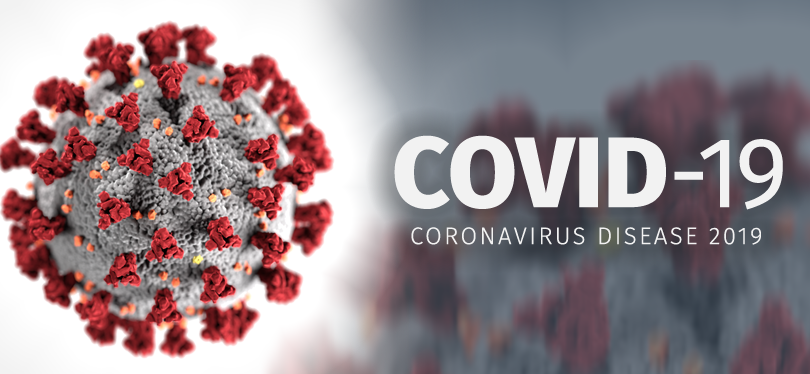

In [435]:
Image("../Images/Covid-19.png")

# Context

### Novel Coronavirus 2019 (nCoV-2019) is a virus which affects respiratory system and was first discovered in wuhan, China. Some early reports suggested that virus may have been transmitted from animal to person. As we know whole world has been shutdown  because of the widespread cases. At this time it's unclear how easily or sustainably this virus is spreading between people.

# Current Cases (WorldWide)
### To know how bad the world has been affected lets get some information on current situation.

#### Lets import all the dependencies for scrapping the website

In [436]:
import bs4
from urllib.request import Request, urlopen
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup as soup
import pandas as pd

In [437]:
# grabbing the url

url = "https://ncov2019.live/"
req = Request(url, headers={"User-Agent" : "Mozilla/5.0"})

webpage = urlopen(req).read()

#parsing it as lxml
pagesoup = soup(webpage,"lxml")

#### Website Information
1. Website Name
2. Link to Website

In [438]:
from IPython.display import display, Markdown

In [439]:
#finding the relevant tags to scrap the data from website

website_name = pagesoup.find('a',class_ = "navbar-brand")
link = "https://ncov2019.live/"
Markdown('<strong>{}</strong>{}'.format(website_name.text,link))

<strong>





    nCoV2019.live
  </strong>https://ncov2019.live/

In [440]:
#some quick facts from the website

quickfacts = pagesoup.find('div', class_ = "container--wrap bg-navy-4")
Markdown('<strong align="center">{}</strong>'.format(quickfacts))

<strong align="center"><div class="container--wrap bg-navy-4">
<p style="color: #DFDFEF; font-size: 30px; text-align: center; padding-top: 15px; font-weight: bolder; margin-bottom: 0;">
    Quick Facts
  </p>
<p style="color: #DFDFEF; font-size: 12px; text-align: center; font-weight: bolder; margin-bottom: 0;">
    updated: <i class="last_updated">A few minutes ago</i>
</p>
<table>
<tr>
<p style="color: rgb(101, 221, 155); font-weight: bold; text-align: center; border-bottom: 0; font-size: 50px; margin-bottom: 0px;">
        38,012,466
      </p>
<p style="color: #DFDFEF; font-size: 18px; font-weight: bold; border-bottom: 0; text-align: center;">
        Total Confirmed
      </p>
</tr>
<tr>
<p style="color: #ff9d00; font-weight: bold; text-align: center; border-bottom: 0; font-size: 50px; margin-bottom: 0px;"> 
          68,925
      </p>
<p style="color: #DFDFEF; font-size: 18px; font-weight: bold; border-bottom: 0; text-align: center;">
        Total Critical
      </p>
</tr>
<tr>
<p style="color: #F65164; font-weight: bold; text-align: center; border-bottom: 0; font-size: 50px; margin-bottom: 0px;">
        1,084,707
      </p>
<p style="color: #DFDFEF; font-size: 18px; font-weight: bold; border-bottom: 0; text-align: center;">
        Total Deceased
      </p>
</tr>
<tr>
<p style="color: rgb(248, 245, 64); font-weight: bold; text-align: center; border-bottom: 0; font-size: 50px; margin-bottom: 0px;">
        8,677,606
      </p>
<p style="color: #DFDFEF; font-size: 18px; font-weight: bold; border-bottom: 0; text-align: center;">
        Total Active
      </p>
</tr>
<tr>
<p style="color: rgb(68, 155, 226); font-weight: bold; text-align: center; border-bottom: 0; font-size: 50px; margin-bottom: 0px;">
        28,071,588
      </p>
<p style="color: #DFDFEF; font-size: 18px; font-weight: bold; border-bottom: 0; text-align: center;">
        Total Recovered
      </p>
</tr>
<tr>
<p style="color: rgb(62, 206, 229); font-weight: bold; text-align: center; border-bottom: 0; font-size: 50px; margin-bottom: 0px;">
        177<!--  / 54 -->
</p>
<p style="color: #DFDFEF; font-size: 18px; font-weight: bold; border-bottom: 0; text-align: center;">
        Total Vaccines In Development
      </p>
</tr>
</table>
</div></strong>

## World COVID-19 Stats

#### We will scrap worldwide covid cases.
1. We'll use pandas read.html which lets us read the webpage table without much of complexity.
2. Convert the table into dataframe for further processing.
3. In the header of the list generated you see a number "1", which was used in the original website as a filter for arranging data in ascending or descending order.

In [441]:
import pandas as pd
import requests

In [442]:
# grabbing latest worldwide data

url = "https://ncov2019.live/data/world"

r = requests.get(url)
df_list = pd.read_html(r.text)            #this parse all html tables from a webpage to alist
world_df = df_list[2]
world_df

,Name,Confirmed,Per Million,Changes Today,Percentage Day Change,Critical,Deceased,Per Million.1,Changes Today.1,Percentage Death Change,Tests,Active,Recovered,Per Million.2,Population
0,TOTAL,38022412,4887,265977,0.7%,68984,1085028,139,3633,0.34%,708574627,8670980,28087839,3610,7780007130
1,★ Afghanistan,39870,1018,71,0.18%,93,1479,38,2,0.14%,114997,5273,33118,846,39167927
2,★ Albania,15570,5412,171,1.11%,16,424,147,4,0.95%,95199,5561,9585,3332,2876906
3,★ Algeria,53225,1208,153,0.29%,25,1809,41,8,0.44%,Unknown,Unknown,37382,848,44069055
4,★ Andorra,2995,0,299,11.09%,25,57,0,2,3.64%,137457,1010,1928,0,77300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,★ Montserrat,13,0,0,0%,Unknown,1,0,0,0%,483,0,12,0,4993
212,★ Falkland Islands,13,0,0,0%,Unknown,Unknown,Unknown,0,0%,2682,Unknown,13,0,3507
213,★ Anguilla,3,0,0,0%,Unknown,Unknown,Unknown,0,0%,1329,Unknown,3,0,15040
214,★ Solomon Islands,2,0,0,0%,Unknown,Unknown,Unknown,0,0%,96,Unknown,Unknown,Unknown,691471


#### Sorting the data on number of confirmed cases

In [443]:
# We will now sort the countries based on total confirmed cases column

world_df = world_df.sort_values("Confirmed" , ascending = False)



#Lets get top 10 affected countries

world_df.head(10)


,Name,Confirmed,Per Million,Changes Today,Percentage Day Change,Critical,Deceased,Per Million.1,Changes Today.1,Percentage Death Change,Tests,Active,Recovered,Per Million.2,Population
0,TOTAL,38022412,4887,265977,0.7%,68984,1085028,139,3633,0.34%,708574627,8670980,28087839,3610,7780007130
169,★ United States,8035319,24236,43321,0.54%,14781,220005,664,310,0.14%,119455343,2641199,5174115,15606,331547490
170,★ India,7173345,5184,54045,0.76%,8944,109894,79,710,0.65%,87872093,838830,6224621,4498,1383789657
171,★ Brazil,5103408,23962,8429,0.17%,8318,150689,708,183,0.12%,17900000,457450,4495269,21106,212982744
172,★ Russia,1312310,8991,13592,1.05%,2300,22722,156,125,0.55%,51191309,265353,1024235,7018,145952169
173,★ Colombia,919083,18009,7767,0.85%,2220,27985,548,151,0.54%,4202181,92702,798396,15644,51034004
7,★ Argentina,903730,19945,9524,1.07%,4287,24186,534,318,1.33%,2239514,146962,732582,16168,45311598
174,★ Spain,888968,19011,9286,1.06%,1546,33124,708,65,0.2%,14590713,705468,150376,3216,46759903
175,★ Peru,849371,25661,0,0%,1210,33305,1006,0,0%,4077357,72097,743969,22477,33099165
176,★ Mexico,817503,6322,3175,0.39%,2391,83781,648,139,0.17%,2088941,139542,594180,4595,129310283


#### Lets see many coulmns are missing values.

In [444]:
world_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 0 to 214
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Name                     216 non-null    object
 1   Confirmed                216 non-null    int64 
 2   Per Million              216 non-null    object
 3   Changes Today            216 non-null    int64 
 4   Percentage Day Change    216 non-null    object
 5   Critical                 216 non-null    object
 6   Deceased                 216 non-null    object
 7   Per Million.1            216 non-null    object
 8   Changes Today.1          216 non-null    int64 
 9   Percentage Death Change  216 non-null    object
 10  Tests                    216 non-null    object
 11  Active                   216 non-null    object
 12  Recovered                216 non-null    object
 13  Per Million.2            216 non-null    object
 14  Population               216 non-null    o

#### Lets import seaborn as well as matplotlib

In [445]:
#We can also visualize the same using seaborn

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

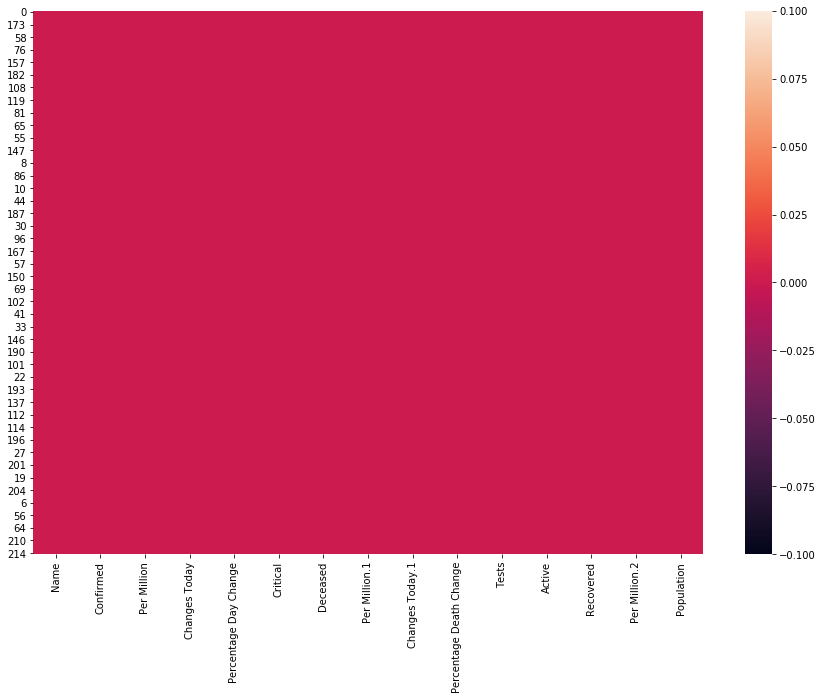

In [446]:
plt.figure(figsize=(15,10))
sns.heatmap(world_df.isnull())

#### We'll use plotly express for visualization.
1. It generates graphs which are interactive and user friendly.
2. We can use zoom in and zoom out feature for proper understanding to a specific part of graph.

In [447]:
import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

#### Plot number of confirmed cases.

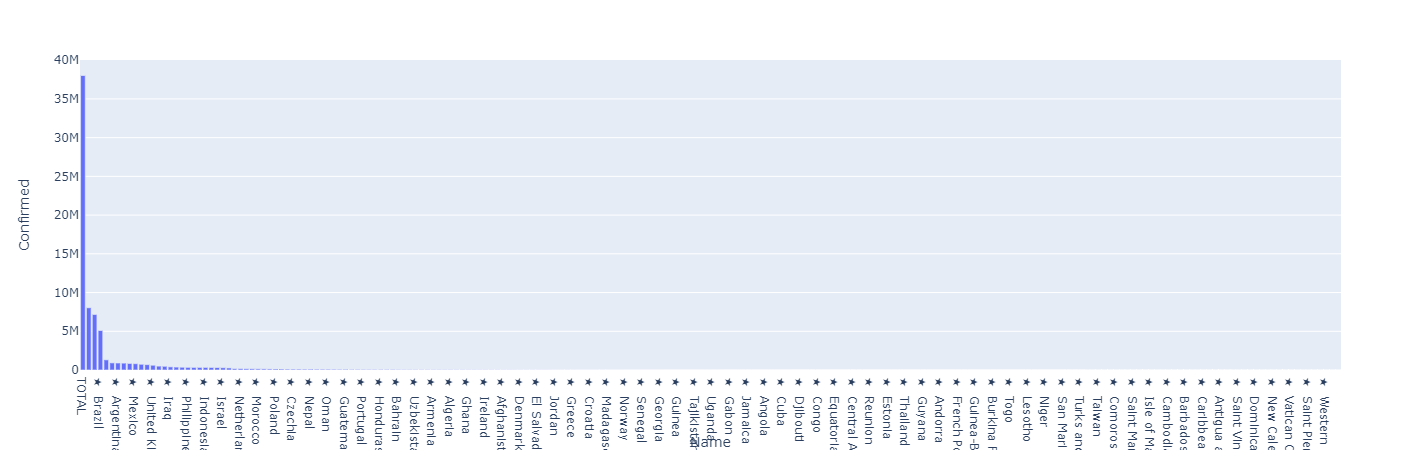

In [448]:
# plotting world_df based on confirmed cases by country names.

world_fig = px.bar(world_df, x = 'Name' , y = 'Confirmed')
world_fig.show()

 - We can zoom in the graph, thats the beauty of plotly.

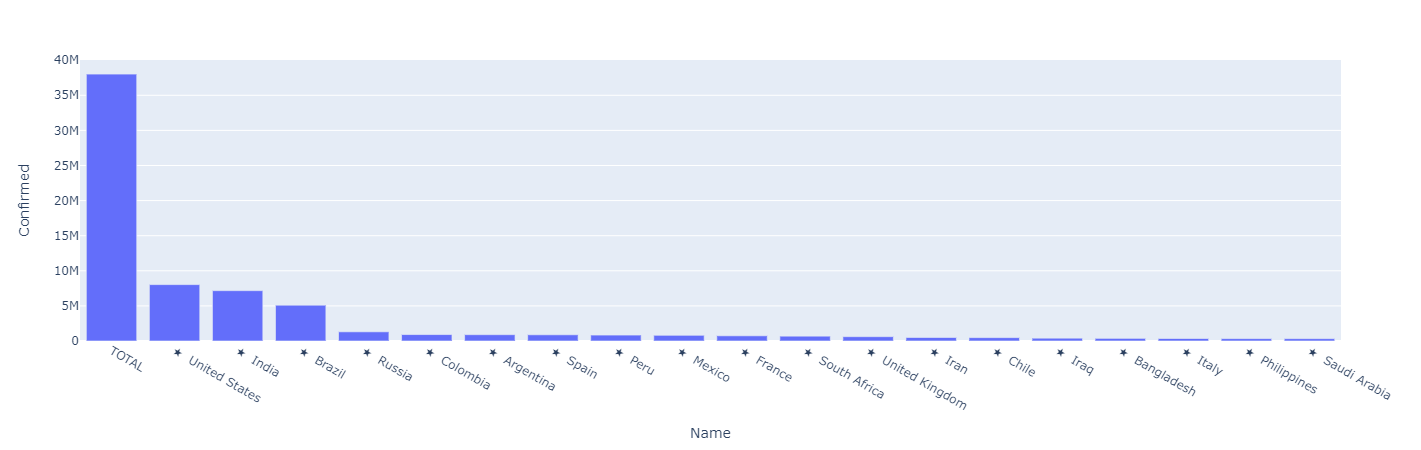

In [449]:
# Lets plot top 20 countries based on confirmed cases.

world_fig = px.bar(world_df.head(20), x = "Name" , y = 'Confirmed')
world_fig.show()

 - Now we can see United states holds number 1 position. (cough cough "we don't wear masks" - americans)
 - Brazil and India comes at the second and third position surpassing Russia respectively.

#### Now we'll try to explore the world_df in more details.(based on number of Deceased People)

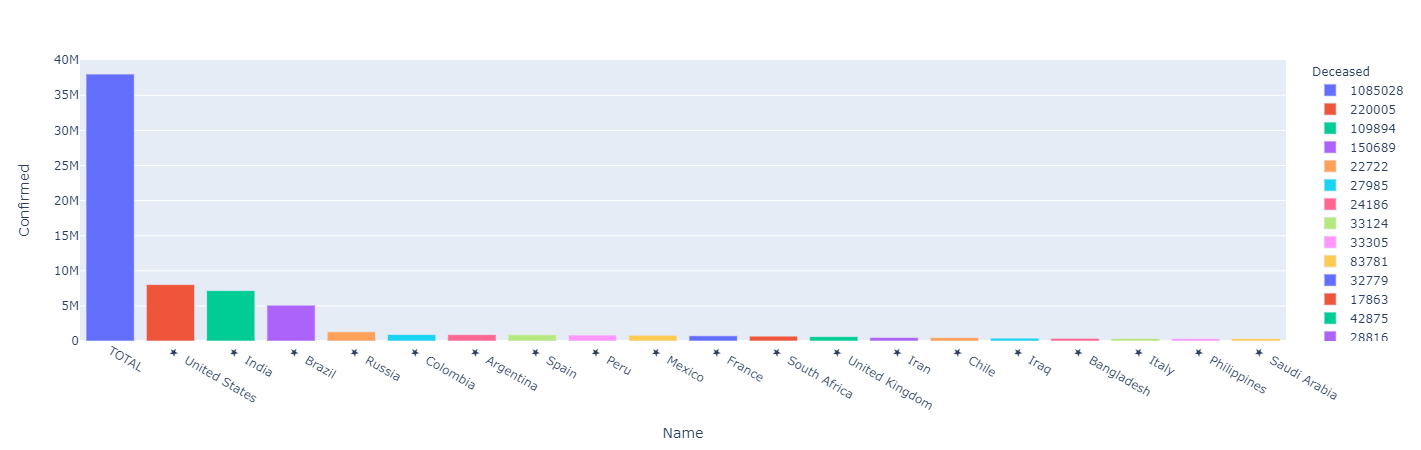

In [450]:
# Lets see how many people have died with respect to countries. (For top 20 countries)

world_fig = px.bar(world_df.head(20), x = 'Name', y = 'Confirmed', color = "Deceased")
world_fig.show()

 - Here the color of each bar corrosponds to how many people have died.
 - We cannot make out which country has most number of deceased people in a descending order.

In [451]:
# lets grab the world_df based on deceased column.
world_df.sort_values('Deceased',ascending = False)

,Name,Confirmed,Per Million,Changes Today,Percentage Day Change,Critical,Deceased,Per Million.1,Changes Today.1,Percentage Death Change,Tests,Active,Recovered,Per Million.2,Population
214,★ Solomon Islands,2,0,0,0%,Unknown,Unknown,Unknown,0,0%,96,Unknown,Unknown,Unknown,691471
153,★ Timor-Leste,29,22,1,3.57%,Unknown,Unknown,Unknown,0,0%,9043,Unknown,28,21,1325347
199,★ Gibraltar,486,0,1,0.21%,2,Unknown,Unknown,0,0%,53530,Unknown,419,0,33688
200,★ Faroe Islands,477,0,0,0%,Unknown,Unknown,Unknown,0,0%,140108,Unknown,463,0,48915
52,★ Eritrea,414,116,0,0%,Unknown,Unknown,Unknown,0,0%,Unknown,Unknown,372,104,3560028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,★ Curacao,585,0,2,0.34%,2,1,0,0,0%,9163,252,332,0,164282
211,★ Montserrat,13,0,0,0%,Unknown,1,0,0,0%,483,0,12,0,4993
27,★ Burundi,525,44,1,0.19%,Unknown,1,0,0,0%,37522,52,472,39,11986354
165,★ Western Sahara,10,0,0,0%,Unknown,1,0,0,0%,Unknown,Unknown,8,0,601338


 - The column contains many unknown values.
 - We'll replace all the unknown values with zero.
 - Then we will arrange the column in descending order for visualization purpose.

In [452]:
# lets replace unknown values to 0.

world_df['Deceased'].replace("Unknown", 0,inplace=True)
world_df['Deceased'] = pd.to_numeric(world_df['Deceased'])          #convert column from type object to int64
world_df['Deceased']

0      1085028
169     220005
170     109894
171     150689
172      22722
        ...   
211          1
212          0
165          1
213          0
214          0
Name: Deceased, Length: 216, dtype: int64

In [453]:
# now again lets grab world_df based on deceased column.

world_df.sort_values('Deceased',ascending = False)

,Name,Confirmed,Per Million,Changes Today,Percentage Day Change,Critical,Deceased,Per Million.1,Changes Today.1,Percentage Death Change,Tests,Active,Recovered,Per Million.2,Population
0,TOTAL,38022412,4887,265977,0.7%,68984,1085028,139,3633,0.34%,708574627,8670980,28087839,3610,7780007130
169,★ United States,8035319,24236,43321,0.54%,14781,220005,664,310,0.14%,119455343,2641199,5174115,15606,331547490
171,★ Brazil,5103408,23962,8429,0.17%,8318,150689,708,183,0.12%,17900000,457450,4495269,21106,212982744
170,★ India,7173345,5184,54045,0.76%,8944,109894,79,710,0.65%,87872093,838830,6224621,4498,1383789657
176,★ Mexico,817503,6322,3175,0.39%,2391,83781,648,139,0.17%,2088941,139542,594180,4595,129310283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,★ Eritrea,414,116,0,0%,Unknown,0,Unknown,0,0%,Unknown,Unknown,372,104,3560028
106,★ Mongolia,318,97,2,0.63%,1,0,Unknown,0,0%,77797,Unknown,310,94,3292872
19,★ Bhutan,309,0,3,0.98%,Unknown,0,Unknown,0,0%,151215,Unknown,288,0,773974
136,★ Seychelles,148,0,0,0%,Unknown,0,Unknown,0,0%,5200,Unknown,144,0,98518


 - Perfecto!. Now we can see that column has been cleared off all the "Unknown".

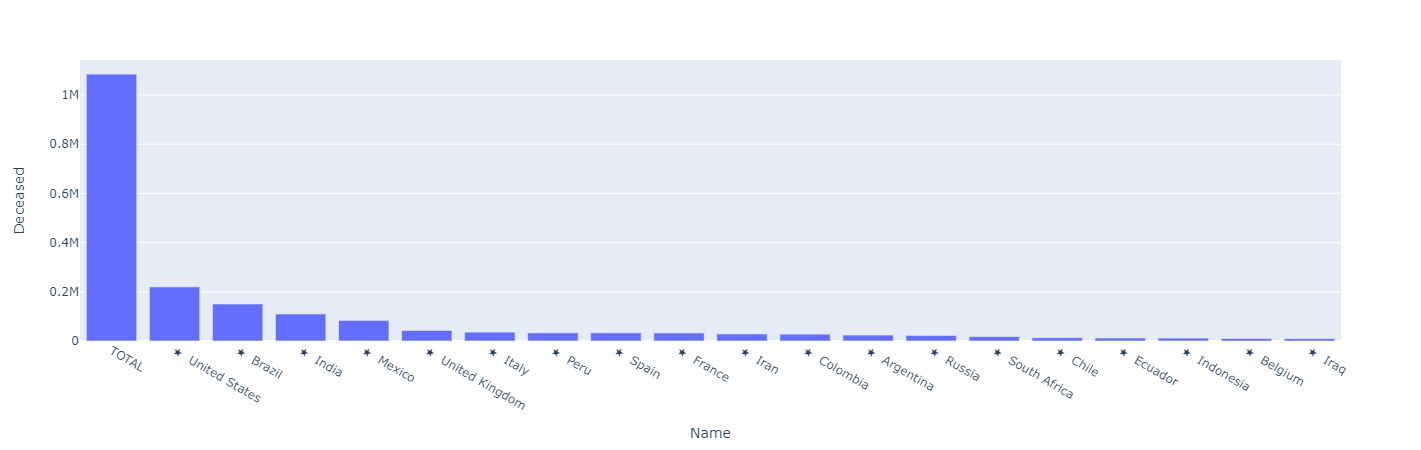

In [454]:
# lets again try ro visualize world_df based on death poll for top 20 countries.

world_fig = px.bar(world_df.sort_values('Deceased', ascending=False).head(20), x = 'Name' , y = 'Deceased')
world_fig.show()


#### Click on the link for more information.

 - United States tops the chart. <a href = "https://www.sciencemag.org/news/2020/04/united-states-leads-coronavirus-cases-not-pandemic-response" > If you want to know why United States leads in coronvirus cases, but not pandemic response</a>
 - Brazil also surpasses 100,000 deaths and becomes the one of the worst affected countries. <a href = "https://www.ctvnews.ca/health/coronavirus/death-became-normal-brazil-surpasses-100-000-deaths-from-covid-19-1.5056757" >'Death became normal': Brazil surpasses 100,000 deaths from COVID-19</a>
 - Mexico's death toll also reached 59.106k and many young people are dying of COVID-19 <a href = "https://www.forbes.com/sites/nathanielparishflannery/2020/07/24/why-are-so-many-young-people-dying-of-covid-19-in-mexico-city/#148bc1f22792">Why Are So Many Young People Dying Of Covid-19 In Mexico City?</a>
 - India has also reached 56k and there are many questions about India's rising COVID-19 infection <a href ="https://www.bbc.com/news/world-asia-india-53018351">Five key questions about India's rising Covid-19 infections</a>

#### Lets visualize the death toll in relation to total confirmed case

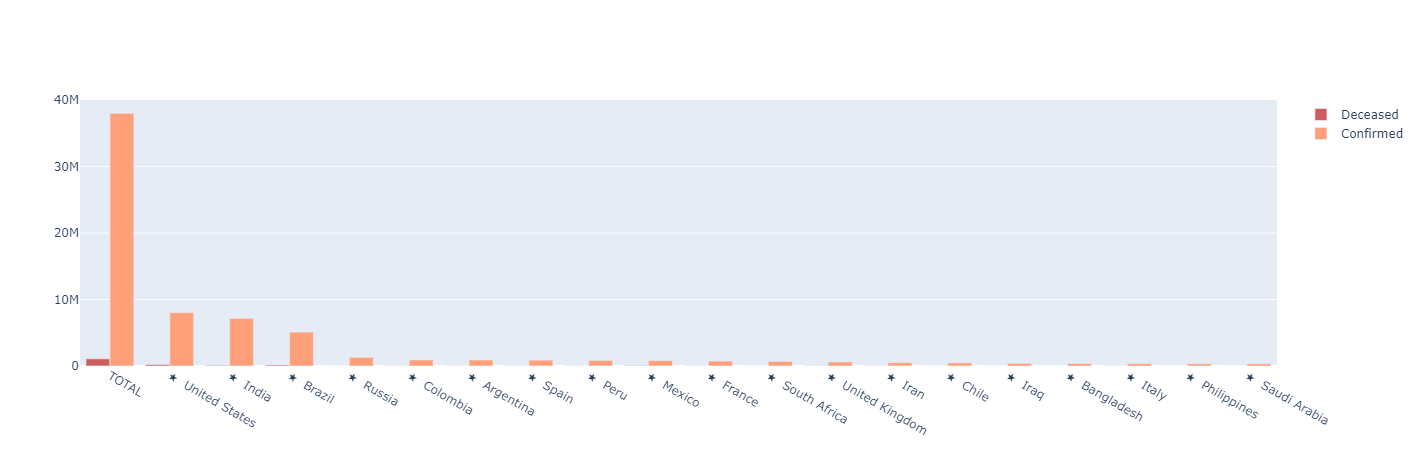

In [455]:
# lets visualize the death toll based on total confirmed case

import plotly.graph_objects as go


# for grouped barplot using Deceased numbers per country and total number of cases per country.

fig = go.Figure(data = [
go.Bar(
    x = world_df['Name'],
    y = world_df["Deceased"].head(20),
    name = "Deceased",
    marker_color = "indianred"
),
go.Bar(
    x = world_df['Name'],
    y = world_df['Confirmed'].head(20),
    name = 'Confirmed',
    marker_color = "lightsalmon"
)
])

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group')
fig.show()

 - Here we can see the Death toll is very low as compared to confirmed cases, which is because most of the people recover from COVID-19. Early estimates predicted that the overall COVID-19 recovery rate is between 97% and 99.75%.
 - Mortality rate calculated  = 3.4% (802.318k/23.09665M)

#### lets visualize the recovered cases based on total confirmed case

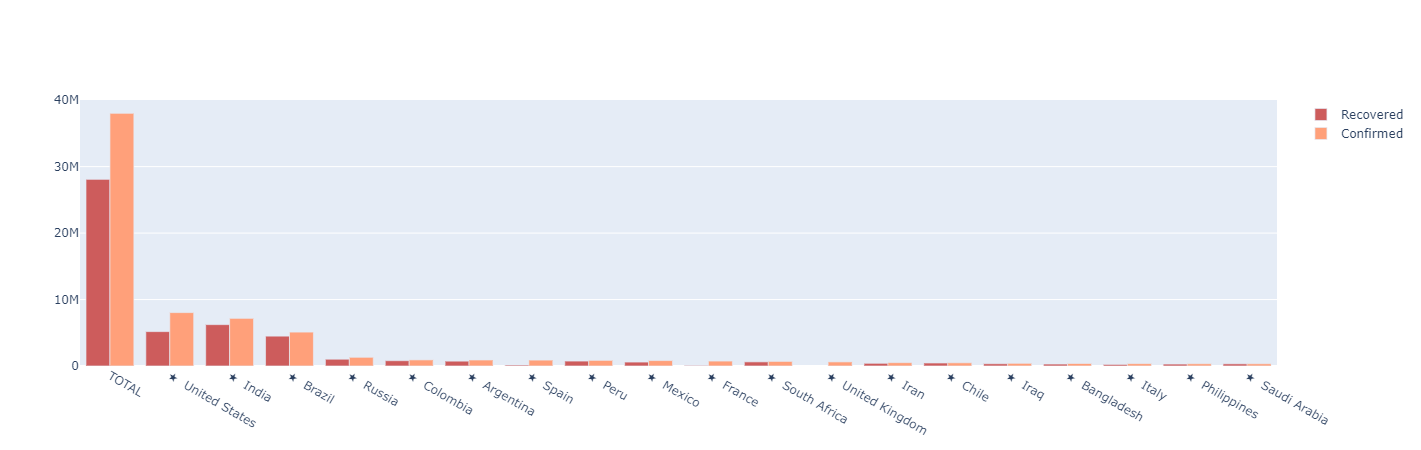

In [456]:
# lets visualize the recovered case based in relation to total confirmed case

import plotly.graph_objects as go


# for grouped barplot using recovered cases per country and total number of cases per country.

fig = go.Figure(data = [
go.Bar(
    x = world_df['Name'],
    y = world_df["Recovered"].head(20),
    name = "Recovered",
    marker_color = "indianred"
),
go.Bar(
    x = world_df['Name'],
    y = world_df['Confirmed'].head(20),
    name = 'Confirmed',
    marker_color = "lightsalmon"
)
])

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group')
fig.show()

 - Here we can see how many person recovered in relation to total cases registered.
 - Recovery rate  = 67% (15.4827M/23.09665M), this contradicts early predicted value of recovery rate which was 97%.
 - Recovery rate and mortality rate are based on how well a country is implementing the testing of its people. <a href = "https://www.who.int/news-room/commentaries/detail/estimating-mortality-from-covid-19">Estimating mortality from COVID-19</a>

#### Lets see who has implemented testing vastly.

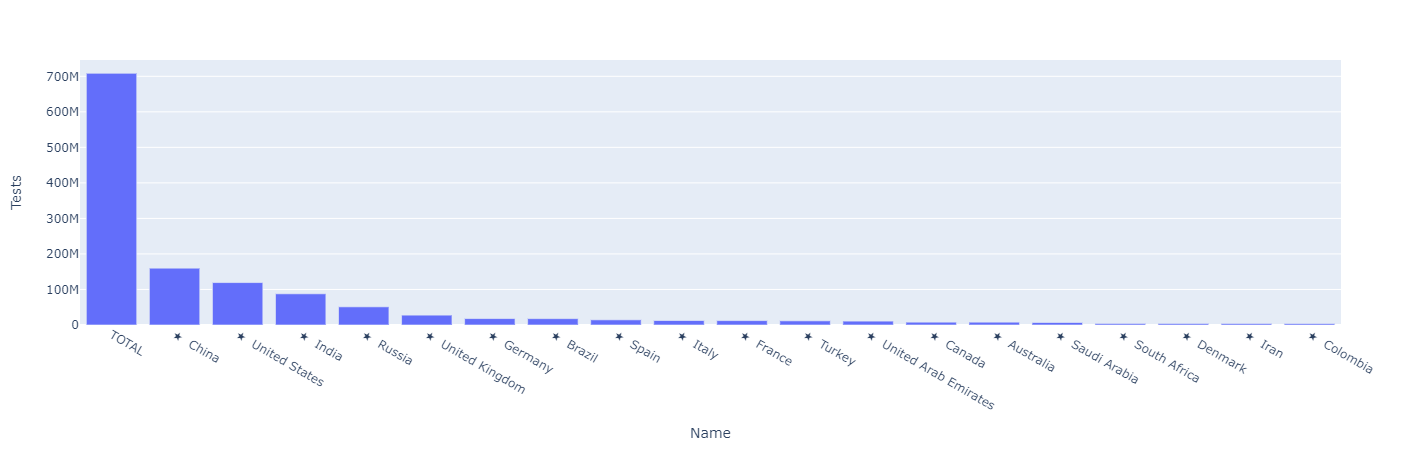

In [457]:
# replace unknown values from the column

world_df['Tests'].replace("Unknown", 0, inplace=True)
world_df['Tests'] = pd.to_numeric(world_df['Tests'])          #convert column from type object to int64



#Now lets plot the data

world_fig = px.bar(world_df.sort_values('Tests', ascending=False).head(20), x = 'Name' , y = 'Tests')
world_fig.show()

 - China on first position that was unexpected. I was expecting United States.
 - As you can see the countries who are vastly testing their people have a upper hand on curbing the spread of virus by implementing policies.

#### lets explore the Confirmed cases in relation to total population

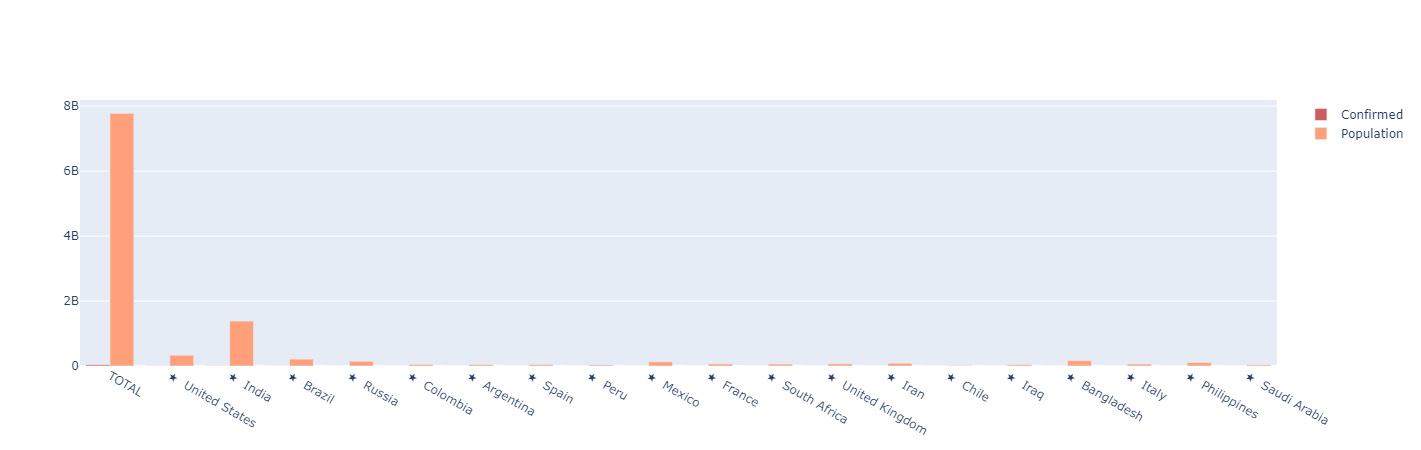

In [458]:
# lets visualize the confirmed case based in relation to total population

import plotly.graph_objects as go


# for grouped barplot using confirmed cases per country and population per country.

fig = go.Figure(data = [
go.Bar(
    x = world_df['Name'],
    y = world_df["Confirmed"].head(20),
    name = "Confirmed",
    marker_color = "indianred"
),
go.Bar(
    x = world_df['Name'],
    y = world_df['Population'].head(20),
    name = 'Population',
    marker_color = "lightsalmon"
)
])

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group')
fig.show()

 - This graph shows a small percentage of people are affected by the novel coronavirus. <a href = "https://www.canada.ca/en/public-health/services/publications/diseases-conditions/people-high-risk-for-severe-illness-covid-19.html">
    People who are at high risk for severe illness from COVID-19</a>

In [459]:
#Mortality calculation

world_df['mortality'] = world_df[['Confirmed','Deceased']].apply(lambda x: (x['Deceased']*100/x['Confirmed']),axis=1 )

#Recovery calculation

world_df['Recovered'] = pd.to_numeric(world_df['Recovered'],errors='coerce')
world_df['recovery'] = world_df[['Confirmed','Recovered']].apply(lambda x: (x['Recovered']*100/x['Confirmed']),axis=1 )

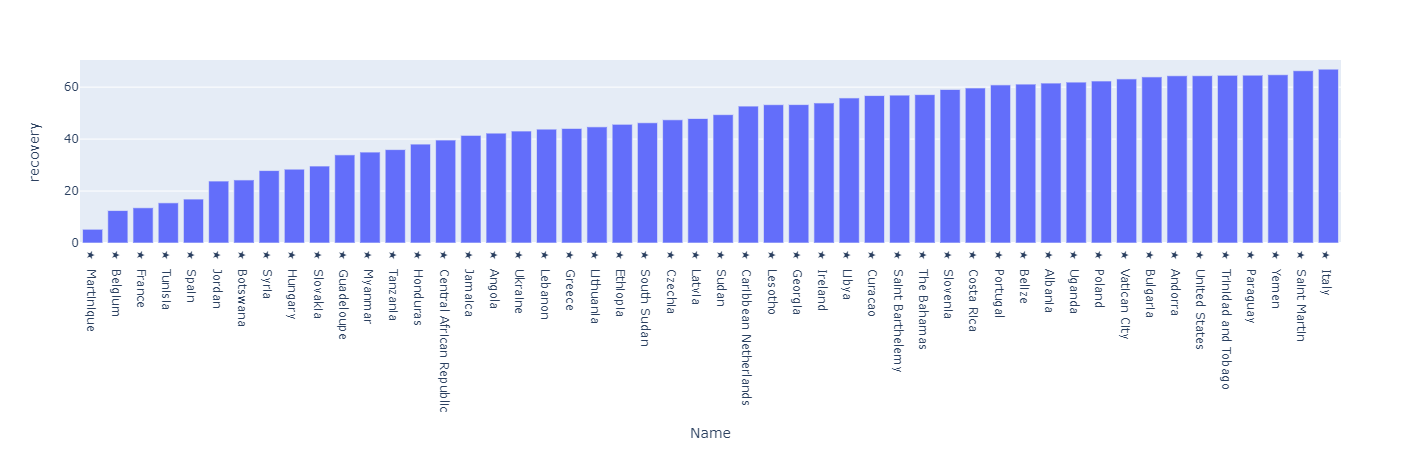

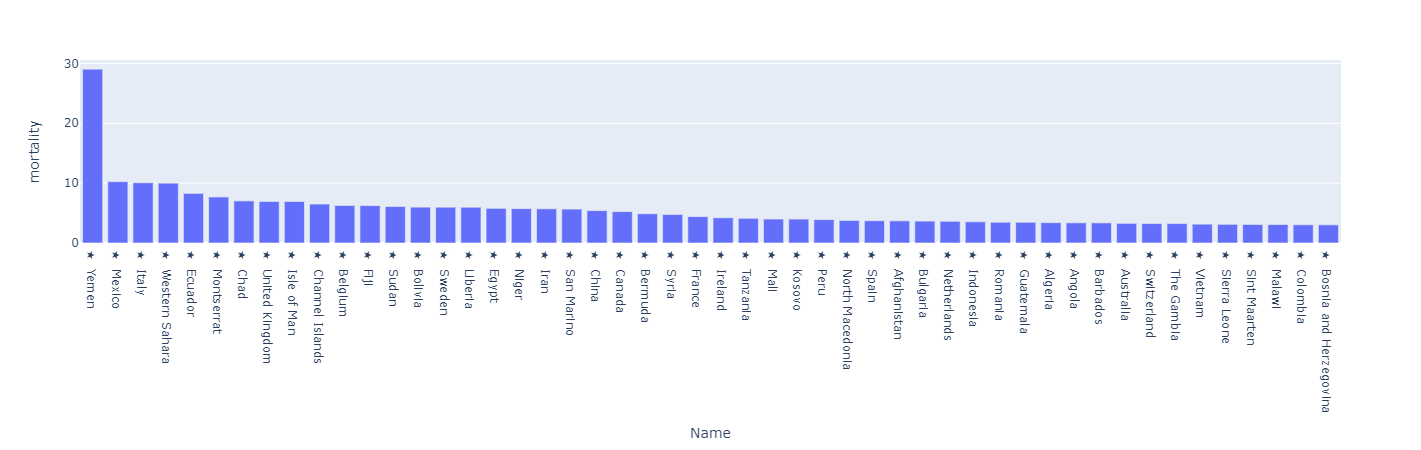

In [460]:
def recovery_mortality_plot():
    
    name = ['recovery','mortality']
    Value=[True,False]
    
    for i,j in zip(name,Value):
        
        world_fig = px.bar(world_df.sort_values(i, ascending=j).head(50), x = 'Name' , y = i)
        world_fig.show()
        
recovery_mortality_plot()

 - **Martinique, Belgium, France** has lowest recovery rate among countries.
 - Yemen has highest mortality rate **~30%**, which is one of the highest in the world and five times the global average. <a href = "https://www.bmj.com/content/370/bmj.m2997">Covid-19: Deaths in Yemen are five times global average as healthcare collapses</a>

#### Lets plot world data using Choropleth Map

In [461]:
world_df.iloc[1:]['Name']

169       ★  United States
170               ★  India
171              ★  Brazil
172              ★  Russia
173            ★  Colombia
              ...         
211          ★  Montserrat
212    ★  Falkland Islands
165      ★  Western Sahara
213            ★  Anguilla
214     ★  Solomon Islands
Name: Name, Length: 215, dtype: object

In [462]:
#something worng with the country names. plotly uses standard ISO-3_codes. Lets try to create a column for country codes

print("{} countries in the list.". format(world_df['Name'].nunique()))

216 countries in the list.


In [463]:
world_df['Name']

0                    TOTAL
169       ★  United States
170               ★  India
171              ★  Brazil
172              ★  Russia
              ...         
211          ★  Montserrat
212    ★  Falkland Islands
165      ★  Western Sahara
213            ★  Anguilla
214     ★  Solomon Islands
Name: Name, Length: 216, dtype: object

#### The country converter (coco) - a Python package for converting country names between different classifications schemes.
<a href = "https://pypi.org/project/country-converter/">For more info please click here</a>.

In [464]:
import country_converter as coco

In [465]:
# Creating a list and appending all the names from world_df column.

Names = []
for i in range(1,215):
    Names.append(world_df.iloc[i]['Name'][3:])

# Insert Total at index 0. we left that because it doesn't contain any start in it.

Names.insert(0,'TOTAL')

In [466]:
Names

['TOTAL',
 'United States',
 'India',
 'Brazil',
 'Russia',
 'Colombia',
 'Argentina',
 'Spain',
 'Peru',
 'Mexico',
 'France',
 'South Africa',
 'United Kingdom',
 'Iran',
 'Chile',
 'Iraq',
 'Bangladesh',
 'Italy',
 'Philippines',
 'Saudi Arabia',
 'Turkey',
 'Indonesia',
 'Germany',
 'Pakistan',
 'Israel',
 'Ukraine',
 'Canada',
 'Netherlands',
 'Belgium',
 'Romania',
 'Morocco',
 'Ecuador',
 'Bolivia',
 'Poland',
 'Qatar',
 'Panama',
 'Czechia',
 'Dominican Republic',
 'Kuwait',
 'Nepal',
 'Kazakhstan',
 'United Arab Emirates',
 'Oman',
 'Egypt',
 'Sweden',
 'Guatemala',
 'Japan',
 'Costa Rica',
 'Portugal',
 'China',
 'Ethiopia',
 'Honduras',
 'Belarus',
 'Venezuela',
 'Bahrain',
 'Switzerland',
 'Moldova',
 'Uzbekistan',
 'Nigeria',
 'Singapore',
 'Armenia',
 'Austria',
 'Lebanon',
 'Algeria',
 'Paraguay',
 'Kyrgyzstan',
 'Ghana',
 'Palestine',
 'Libya',
 'Ireland',
 'Azerbaijan',
 'Kenya',
 'Afghanistan',
 'Hungary',
 'Serbia',
 'Denmark',
 'Tunisia',
 'Bosnia and Herzegovina',


In [467]:
standard_names = coco.convert(names= Names, to='ISO3')

In [468]:
map_data = world_df[world_df['Name']!='TOTAL']
print(map_data.nunique())
print(len(standard_names))

Name                       215
Confirmed                  208
Per Million                157
Changes Today              121
Percentage Day Change      115
Critical                    86
Deceased                   165
Per Million.1              100
Changes Today.1             44
Percentage Death Change     85
Tests                      197
Active                     167
Recovered                  206
Per Million.2              153
Population                 215
mortality                  193
recovery                   203
dtype: int64
215


In [469]:
# Adding the ISO3 code in a new world_df['Code'] column.

map_data['code'] = standard_names
map_data['code'] = map_data['code'].shift(-1)
map_data.head()


map_data = map_data[:213]
map_data

# Removing countries of which ISO3 code is not available

choropleth_data = map_data[map_data['code'] != "not found"]
choropleth_data

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Name,Confirmed,Per Million,Changes Today,Percentage Day Change,Critical,Deceased,Per Million.1,Changes Today.1,Percentage Death Change,Tests,Active,Recovered,Per Million.2,Population,mortality,recovery,code
169,★ United States,8035319,24236,43321,0.54%,14781,220005,664,310,0.14%,119455343,2641199,5174115.0,15606,331547490,2.737975,64.392154,USA
170,★ India,7173345,5184,54045,0.76%,8944,109894,79,710,0.65%,87872093,838830,6224621.0,4498,1383789657,1.531977,86.774315,IND
171,★ Brazil,5103408,23962,8429,0.17%,8318,150689,708,183,0.12%,17900000,457450,4495269.0,21106,212982744,2.952713,88.083669,BRA
172,★ Russia,1312310,8991,13592,1.05%,2300,22722,156,125,0.55%,51191309,265353,1024235.0,7018,145952169,1.731451,78.048251,RUS
173,★ Colombia,919083,18009,7767,0.85%,2220,27985,548,151,0.54%,4202181,92702,798396.0,15644,51034004,3.044883,86.868759,COL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,★ Greenland,16,0,0,0%,Unknown,0,Unknown,0,0%,8879,Unknown,14.0,0,56798,0.000000,87.500000,GRL
210,★ Saint Pierre and Miquelon,16,0,0,0%,Unknown,0,Unknown,0,0%,2144,Unknown,12.0,0,5786,0.000000,75.000000,SPM
211,★ Montserrat,13,0,0,0%,Unknown,1,0,0,0%,483,0,12.0,0,4993,7.692308,92.307692,MSR
212,★ Falkland Islands,13,0,0,0%,Unknown,0,Unknown,0,0%,2682,Unknown,13.0,0,3507,0.000000,100.000000,FLK


In [470]:
#lets again try to plot the data using choropleth dataframe.

# For using choropleth first we have to make a dictionary

data = dict(
        type = 'choropleth',
        locations = choropleth_data['code'],
        z = choropleth_data['Confirmed'],
        text = choropleth_data['Deceased'],
        marker = dict(line = dict(color = 'rgb(255,255,255)',width = 2)),
        colorbar = {'title' : "Confirmed Cases"}
        )

In [471]:
# Now create a layout for the graph

layout = dict(
    
    title = 'World COVID-19 Stats',
    geo = dict(
        showframe = False,
        projection = {'type':'mercator'}
    )
    )

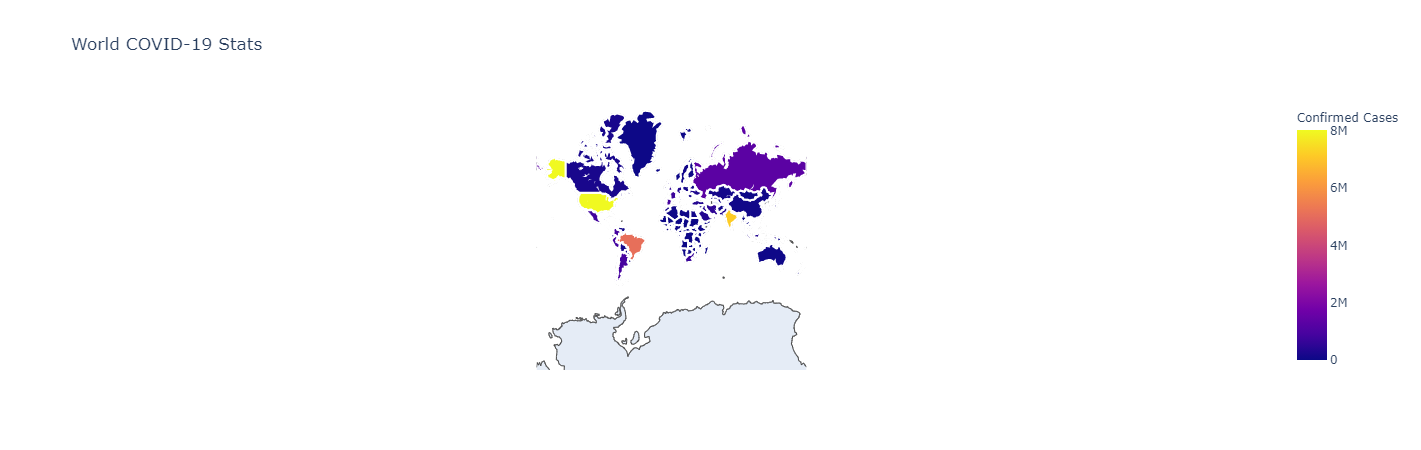

In [472]:
# Finally we will pass both layout and data dictionary to generate the map.
choromap = go.Figure(data = [data],layout = layout)
choromap.show()

## Canada COVID-19 Stats

#### Lets get Latest Canada's information.
1. We'll use the pandas read.html which lets us read the webpage table without much of complexity.
2. We can also use the lsit to convert it to a dataframe.
3. In the header of the list generated you see a number "1", which was used in the original website as a filter for arranging data in ascending or descending order.

In [473]:
#grabbing latest canada specific data

url = "https://ncov2019.live/data/canada"

r = requests.get(url)
df_list = pd.read_html(r.text) # this parses all the tables in webpages to a list
canada_df = df_list[2]
canada_df

,Name,Confirmed,Per Million,Changes Today,Percentage Day Change,Critical,Deceased,Per Million.1,Changes Today.1,Percentage Death Change,Tests,Active,Recovered,Per Million.2,Population
0,TOTAL,184390,Unknown,0,0%,154,9665,Unknown,0,0%,8047974,18836,155888,Unknown,Unknown
1,★ Alberta,19995,Unknown,0,0%,Unknown,283,Unknown,0,0%,Unknown,Unknown,17488,Unknown,Unknown
2,★ British Columbia,10185,Unknown,0,0%,Unknown,245,Unknown,0,0%,Unknown,Unknown,8534,Unknown,Unknown
3,★ Manitoba,2578,Unknown,0,0%,Unknown,32,Unknown,0,0%,Unknown,Unknown,1483,Unknown,Unknown
4,★ New Brunswick,272,Unknown,0,0%,Unknown,2,Unknown,0,0%,Unknown,Unknown,199,Unknown,Unknown
5,★ Newfoundland and Labrador,282,Unknown,0,0%,Unknown,4,Unknown,0,0%,Unknown,Unknown,269,Unknown,Unknown
6,★ Northwest Territories,5,Unknown,0,0%,Unknown,Unknown,Unknown,0,0%,Unknown,Unknown,5,Unknown,Unknown
7,★ Nova Scotia,1092,Unknown,0,0%,Unknown,65,Unknown,0,0%,Unknown,Unknown,1023,Unknown,Unknown
8,★ Ontario,61678,Unknown,0,0%,Unknown,3056,Unknown,0,0%,Unknown,Unknown,53087,Unknown,Unknown
9,★ Prince Edward Island,63,Unknown,0,0%,Unknown,Unknown,Unknown,0,0%,Unknown,Unknown,58,Unknown,Unknown


## Canada COVID-19 Stats

#### Lets visualize Canada's Data and see which province has been worst effected.
1. We'll use the same above canada_df for visualization purpose.
2. We are going to use this dataframe because it's the latest data and our script we'll update the data every time we run the cell based on the website mentioned above.
3. I'm going to use plotly for visualization purpose as it generates graphs which are interactive and user friendly.

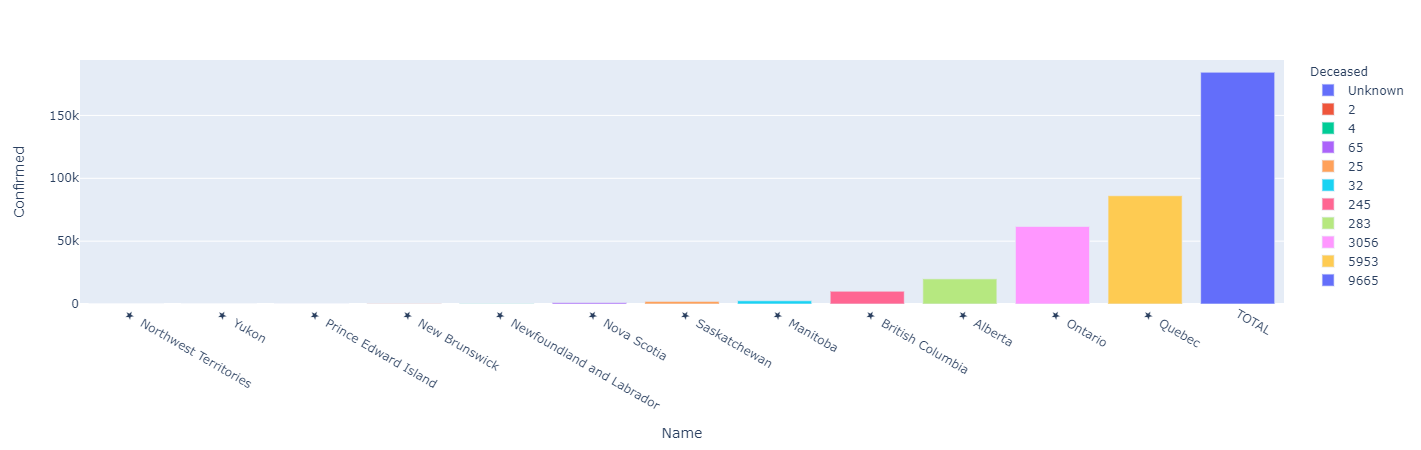

In [474]:
canada_fig = px.bar(canada_df.sort_values('Confirmed'),x='Name',y='Confirmed',color="Deceased")
canada_fig.show()

 - Quebec has maximum number of confirmed cases and twice as many deceased people than ontario. <a href = "https://www.ctvnews.ca/health/coronavirus/quebec-leads-canada-in-coronavirus-deaths-so-why-is-it-starting-to-reopen-1.4928940"> Quebec leads Canada in Coronavirus deaths</a>
 - In this article I also found one more interesting thing that Alberta has done more testing per capita, and along with good policies the death polls remains below 500.
 - There a some provinces where there were less to no cases, and no death has been reported, because quite a few people live there.

#### Lets see relation between total confirmed cases to recovered cases.

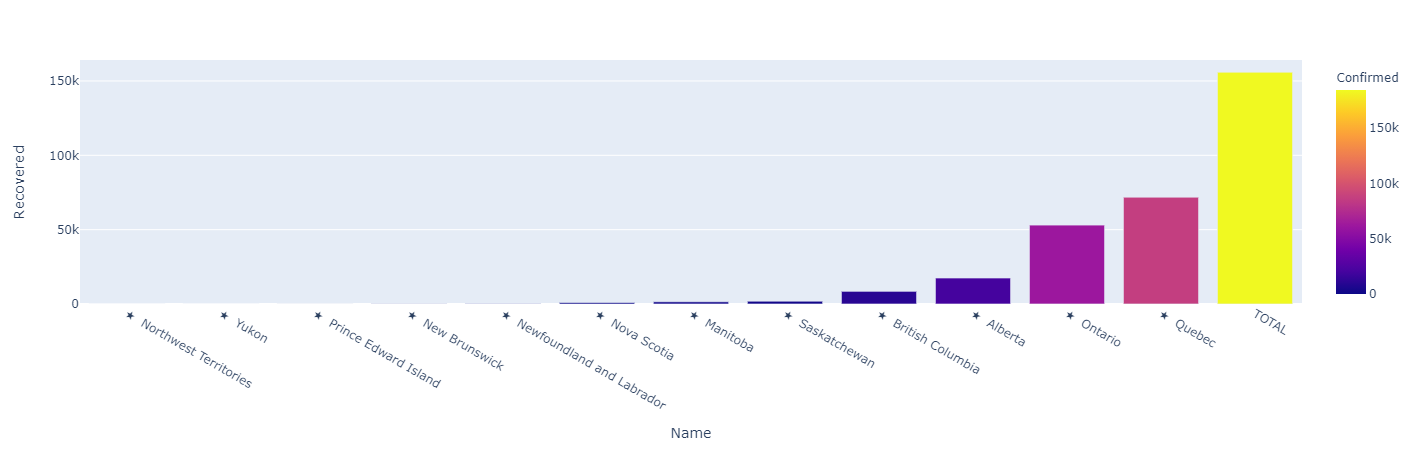

In [475]:
canada_fig = px.bar(canada_df.sort_values('Recovered'), x = 'Name', y = 'Recovered',color='Confirmed')
canada_fig.show()

#### Lets calculate recovery rate in Canada and Alberta specifically

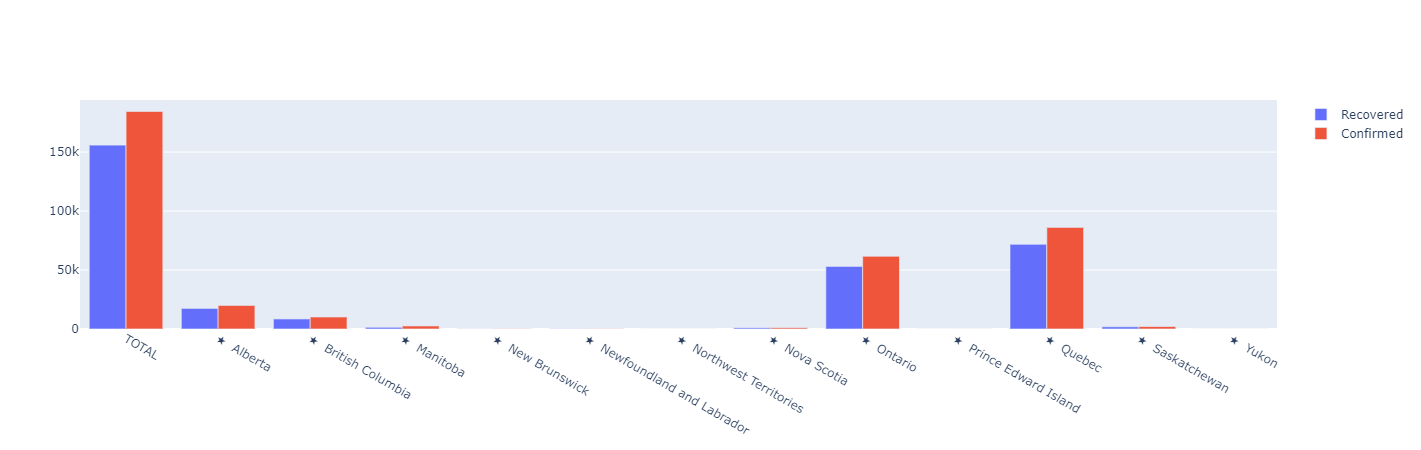

In [476]:
fig = go.Figure(data = [
    go.Bar(
    x = canada_df['Name'],
    y = canada_df['Recovered'],
    name = "Recovered"
    ),
    
    go.Bar(
    x = canada_df['Name'],
    y = canada_df['Confirmed'],
    name = "Confirmed"
    )
])

fig.update_layout(barmode = "group")
fig.show()

 - Recovery rate canada wide is 88% which is 21% higher than the worldwide recovery rate. This also brings in another factor the geographical location a patient is in and how is the healthcare system there.
 - Alberta's recovery rate is also 89% which is close to overall recovery rate.   

#### lets calculate mortality rate.

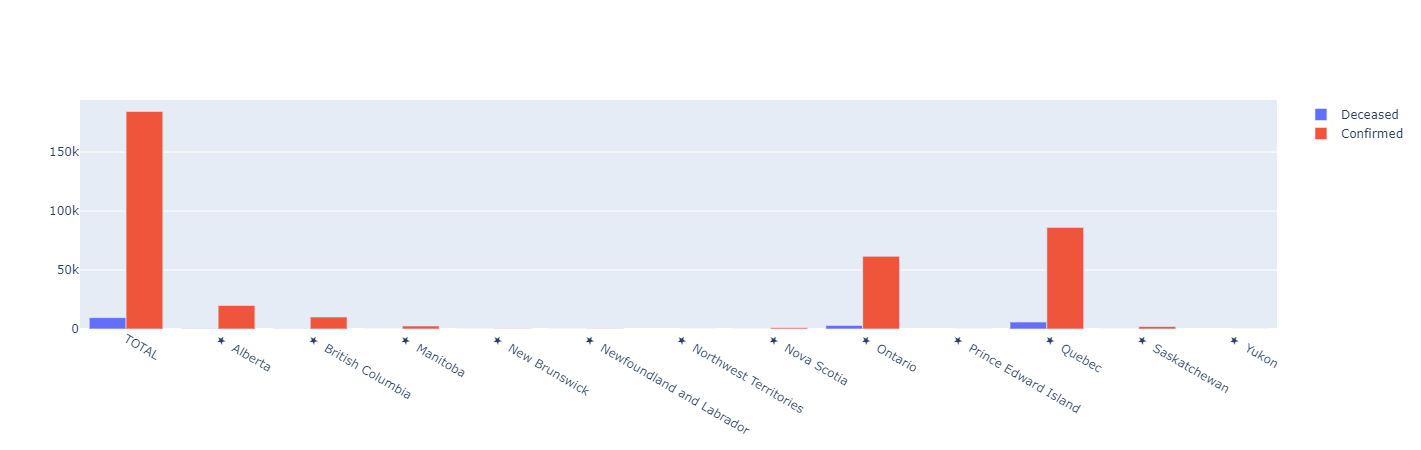

In [477]:
fig = go.Figure(data = [
    go.Bar(
    x = canada_df['Name'],
    y = canada_df['Deceased'],
    name = "Deceased"
    ),
    
    go.Bar(
    x = canada_df['Name'],
    y = canada_df['Confirmed'],
    name = "Confirmed"
    )
])

fig.update_layout(barmode = "group")
fig.show()

 - Mortality rate of overall canada is 7% (9118/126.804k)
 - Mortality rate of Alberta is 1.8% which is quite astounding. Alberta is implementing policies very efficiently and because of that it has such a low mortality rate.
 - Highest mortality rate is of Quebec 8.9%.
 - Second highest mortality rate is of ontario 6.5%

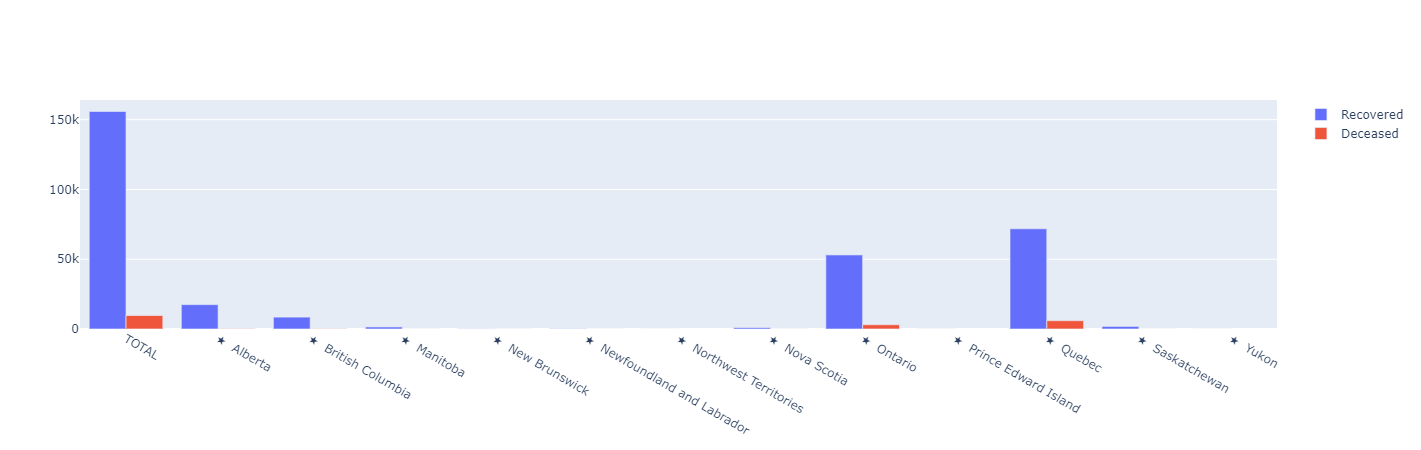

In [478]:
fig = go.Figure(data = [
    go.Bar(
    x = canada_df['Name'],
    y = canada_df['Recovered'],
    name = "Recovered"
    ),
    
    go.Bar(
    x = canada_df['Name'],
    y = canada_df['Deceased'],
    name = "Deceased"
    )
])

fig.update_layout(barmode = "group")
fig.show()

## Model for predicting the number of confirmed cases.

In [479]:
# import confirmed cases data

confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

#Getting all the dates
cols = confirmed_df.keys()
confirmed = confirmed_df.loc[:4,cols[4]:cols[-1]]

dates = confirmed.keys()

In [480]:
worldcases = []

for i in ((dates)):
    
    confirmed_sum = confirmed[i].sum()
    
    worldcases.append(confirmed_sum)

In [481]:
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime

In [482]:
days_in_future = 60
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-60]

In [483]:
start = '1/20/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [484]:
days_from_1_20 = np.array([i for i in range(len(dates))]).reshape(-1,1)

#### Train Test Split

In [485]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_from_1_20[50:], worldcases[50:], test_size=0.05, shuffle=False) 

#### Support Vector Machine Model

In [486]:
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01,epsilon=1,degree=3,C=0.1)
svm_confirmed.fit(X_train_confirmed,y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)

MAE: 41063.846694050706
MSE: 1701675246.6644242


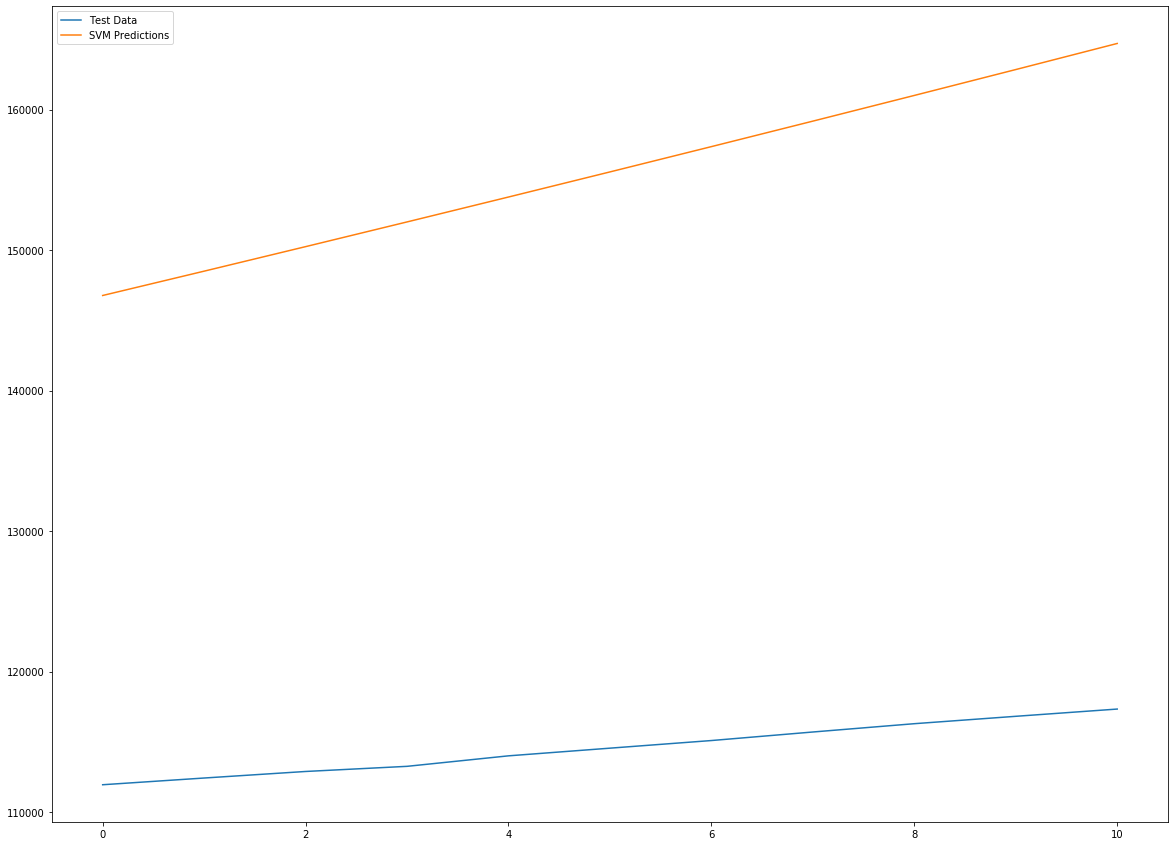

In [487]:
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.figure(figsize=(20,15))
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

#### Linear Regression model

In [488]:
# transform our data for polynomial regression
poly = PolynomialFeatures(degree=5)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)

In [489]:
# polynomial regression
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))


MAE: 706.5846217589199
MSE: 504801.78802049434


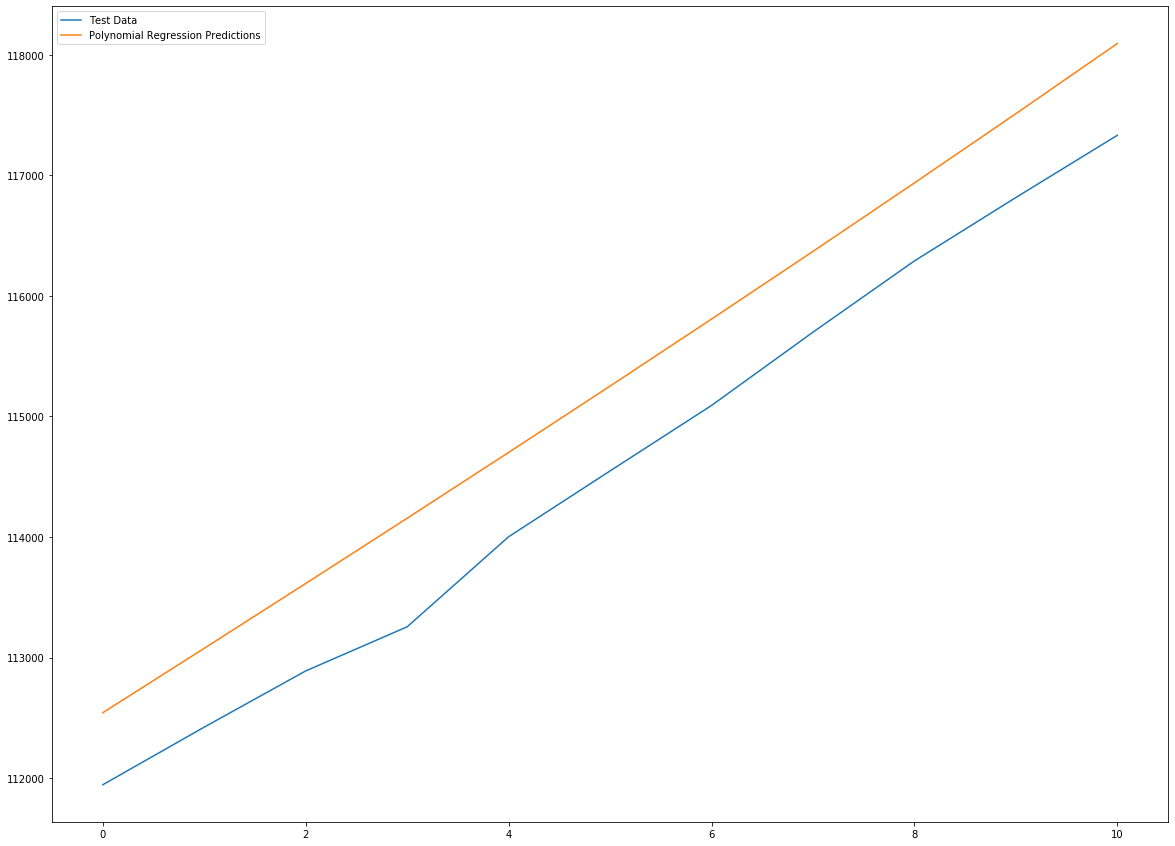

In [490]:
plt.figure(figsize=(20,15))
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

In [491]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,39290,39297,39341,39422,39486,39548,39616,39693,39703,39799
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,13965,14117,14266,14410,14568,14730,14899,15066,15231,15399
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,51847,51995,52136,52270,52399,52520,52658,52804,52940,53072
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,2110,2110,2110,2370,2370,2568,2568,2696,2696,2696
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,5211,5370,5402,5530,5725,5725,5958,6031,6246,6366


In [492]:
# Transposing the row for time series analysis

confirmed_df = confirmed_df.T
confirmed_df = confirmed_df.rename(columns=confirmed_df.iloc[1])
confirmed_df

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Australia,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
Province/State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australian Capital Territory,New South Wales,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Australia,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
Lat,33.9391,41.1533,28.0339,42.5063,-11.2027,17.0608,-38.4161,40.0691,-35.4735,-33.8688,...,55.3781,-32.5228,41.3775,6.4238,14.0583,31.9522,24.2155,15.5527,-13.1339,-19.0154
Long,67.71,20.1683,1.6596,1.5218,17.8739,-61.7964,-63.6167,45.0382,149.012,151.209,...,-3.436,-55.7658,64.5853,-66.5897,108.277,35.2332,-12.8858,48.5164,27.8493,29.1549
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10/7/20,39548,14730,52520,2568,5725,108,840915,53755,113,4261,...,544275,2206,59579,80404,1099,42840,10,2049,15224,7919
10/8/20,39616,14899,52658,2568,5958,111,856369,54473,113,4271,...,561815,2226,60026,81019,1100,43256,10,2050,15301,7951
10/9/20,39693,15066,52804,2696,6031,111,871468,55087,113,4273,...,575679,2251,60342,81696,1105,43664,10,2051,15339,7994
10/10/20,39703,15231,52940,2696,6246,111,883882,55736,113,4278,...,590844,2268,60776,82453,1107,43945,10,2051,15415,8010


In [493]:
confirmed_df = confirmed_df[4:]
confirmed_df

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Australia,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10/7/20,39548,14730,52520,2568,5725,108,840915,53755,113,4261,...,544275,2206,59579,80404,1099,42840,10,2049,15224,7919
10/8/20,39616,14899,52658,2568,5958,111,856369,54473,113,4271,...,561815,2226,60026,81019,1100,43256,10,2050,15301,7951
10/9/20,39693,15066,52804,2696,6031,111,871468,55087,113,4273,...,575679,2251,60342,81696,1105,43664,10,2051,15339,7994
10/10/20,39703,15231,52940,2696,6246,111,883882,55736,113,4278,...,590844,2268,60776,82453,1107,43945,10,2051,15415,8010


In [494]:
confirmed_df['Total_cases'] = confirmed_df.sum(axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [495]:
# converting the index column to date

confirmed_df.reset_index(level=0,inplace=True)
confirmed_df

,index,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe,Total_cases
0,1/22/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,555.0
1,1/23/20,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,654.0
2,1/24/20,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,941.0
3,1/25/20,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,1434.0
4,1/26/20,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,2118.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,10/7/20,39548,14730,52520,2568,5725,108,840915,53755,113,...,2206,59579,80404,1099,42840,10,2049,15224,7919,36156226.0
260,10/8/20,39616,14899,52658,2568,5958,111,856369,54473,113,...,2226,60026,81019,1100,43256,10,2050,15301,7951,36515563.0
261,10/9/20,39693,15066,52804,2696,6031,111,871468,55087,113,...,2251,60342,81696,1105,43664,10,2051,15339,7994,36876248.0
262,10/10/20,39703,15231,52940,2696,6246,111,883882,55736,113,...,2268,60776,82453,1107,43945,10,2051,15415,8010,37207057.0


In [498]:
confirmed_df['dates'] = pd.to_datetime(confirmed_df['index'])
confirmed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Columns: 269 entries, index to dates
dtypes: datetime64[ns](1), float64(1), object(267)
memory usage: 554.9+ KB


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [499]:
time_series_analysis_df = confirmed_df[['Total_cases','dates']]
time_series_analysis_df

,Total_cases,dates
0,555.0,2020-01-22
1,654.0,2020-01-23
2,941.0,2020-01-24
3,1434.0,2020-01-25
4,2118.0,2020-01-26
...,...,...
259,36156226.0,2020-10-07
260,36515563.0,2020-10-08
261,36876248.0,2020-10-09
262,37207057.0,2020-10-10


In [500]:
# Now we will set the dates column as the index of the dataframe to allow us really explore the our data.

time_series_analysis_df = time_series_analysis_df.set_index('dates')
time_series_analysis_df

,Total_cases
dates,
2020-01-22,555.0
2020-01-23,654.0
2020-01-24,941.0
2020-01-25,1434.0
2020-01-26,2118.0
...,...
2020-10-07,36156226.0
2020-10-08,36515563.0
2020-10-09,36876248.0


#### Additive model 
 1. This model is used when the time series level does not vary with the variations around the trend. Here, the time series components are simply added together using the formula:
     - y(t) = Level(t) + Trend(t) + Seasonality(t) + Noise(t)

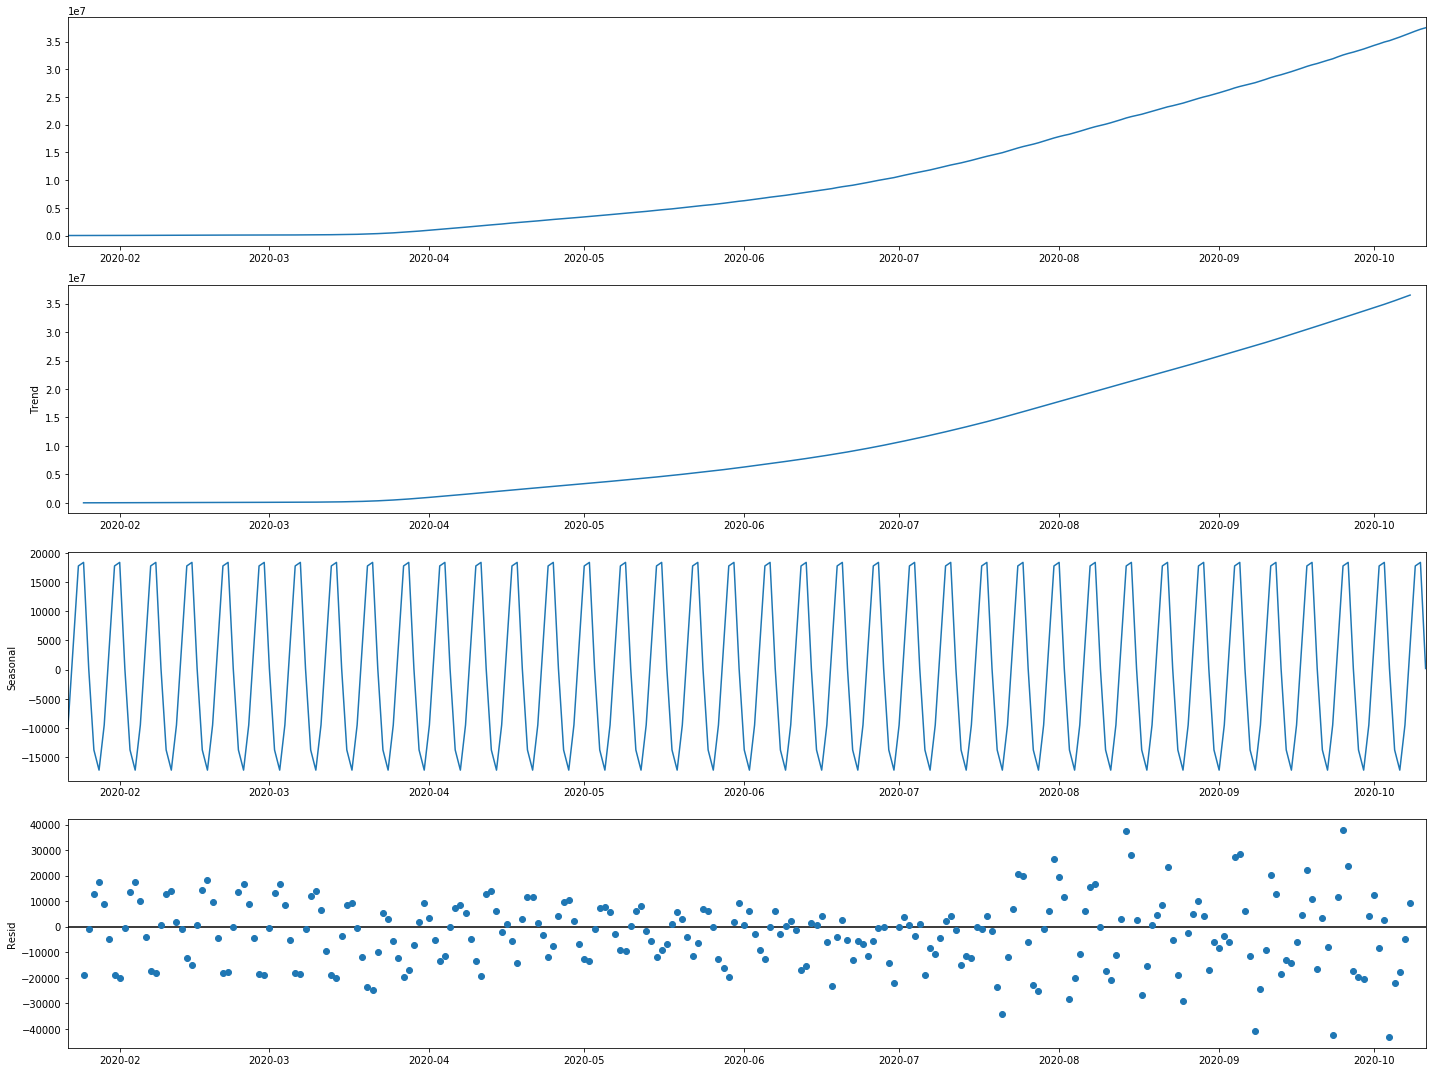

In [504]:
import matplotlib
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(time_series_analysis_df,model='additive')
fir = decomposition.plot()
matplotlib.rcParams['figure.figsize']=[20.0,10.0]